# Diffusivity Package

In the following code cells, the newly developed diffusivity package will be tested.

In [1]:
from diffusivity import*

### Testing the difusivity package

In [2]:
T2=DiffusivityMeasurement('./testing_meas/200212_200109A_diffusweep.mat')
T2.RTfit.fit_function_type = 'richards'

Determination of diffusivity and result values

In [12]:
T2.fit_function_parameters(B='all')
#print(T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8))
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
D, dBc2dT, B_0, err_D, err_dBc2dT, r_squared = d_values
print(d_values)
print('D: ', D)
print('dBc2dT: ', dBc2dT)
print('B_0: ', B_0)
print('err_D: ', err_D)
print('err_dBc2dT: ', err_dBc2dT)
print('r_squared: ', r_squared)
print('\n')
print('Diffusivity', T2.diffusivity)
print('Err diffusivity', T2.diffusivity_err)
print('Film Tc: ', T2.Tc_0T)


C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:383: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:383: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.6317852772725548, -1.73665482153861, 15.084287714859357, 1.9146731156996717e-07, 0.005263063920078837, 0.9962667585487355)
D:  0.6317852772725548
dBc2dT:  -1.73665482153861
B_0:  15.084287714859357
err_D:  1.9146731156996717e-07
err_dBc2dT:  0.005263063920078837
r_squared:  0.9962667585487355


Diffusivity 0.6317852772725548
Err diffusivity 1.9146731156996717e-07
Film Tc:  8.685829519936066


get Bc2vsT

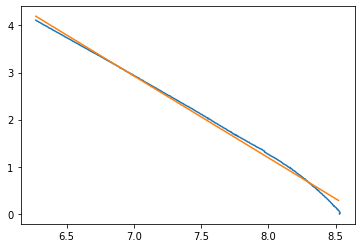

In [5]:
%matplotlib inline
T, Bc2 = T2.Bc2_vs_T()
plt.plot(T, Bc2)
T_fit, Bc2_fit = T2.Bc2vsT_fit.linear_fit()
plt.plot(T_fit, Bc2_fit)
#print(T2.Bc2_vs_T())
#print(T2.Bc2_vs_T(err=True))

get RvsT

<ErrorbarContainer object of 3 artists>

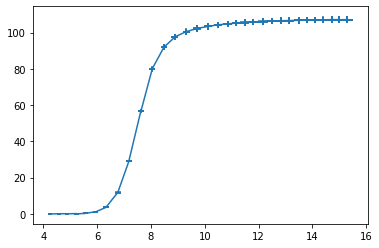

In [6]:
%matplotlib inline
# using default B
# T, R = T2.R_vs_T()
# for t, r in zip(T.values(), R.values()):
#     plt.plot(t,r)

# B as scalar
# plt.plot(*T2.R_vs_T(B=0.1))

# B as list
# B=[1,2,3,4]
# T, R = T2.R_vs_T(B)
# for t, r in zip(T.values(), R.values()):
#     plt.plot(t,r)
  
# Returning errors as well
T, R, T_err, R_err = T2.R_vs_T(B=2, err=True)
fig = plt.figure()
ax=fig.add_subplot(111)
ax.errorbar(T, R, yerr=R_err, xerr=T_err)

# print(T,R)
# print(T,R,T_err, R_err)

get R vs B

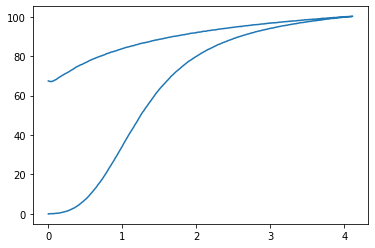

In [9]:
# print(T2.R_vs_B(9))
#print(T2.R_vs_B(9, err=True))
plt.plot(*T2.R_vs_B(5))

get Parameters

In [10]:
# print(T2.fit_function_parameters())
print(T2.fit_function_parameters(B=0.1))
#print(T2.fit_function_parameters(B='all'))

T2.parameters_RTfit={}
# shows dict_param is updated continuously
T2.fit_function_parameters(B=[1,2,3,4])
print(T2.parameters_RTfit)
T2.fit_function_parameters(B=[2.5,3.5])
print(T2.parameters_RTfit)
T2.fit_function_parameters(B=2.3)
print(T2.parameters_RTfit)

C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:383: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


{'b': 2.676508721306659, 'm': 4.437911351465331, 'nu': 2.667230771607371e-05, 'k': 105.60049274116128}
{1.0: {'b': 2.228124562343688, 'm': 4.209032363743418, 'nu': 0.00022690251363382372, 'k': 105.78674439477746}, 2.0: {'b': 1.7243422320262551, 'm': 6.582717821504231, 'nu': 0.24583319609557555, 'k': 106.03581073238112}, 3.0: {'b': 1.4942576823328757, 'm': 5.739997762171316, 'nu': 0.21825315418253186, 'k': 106.33217665373228}, 4.0: {'b': 1.3662758623169484, 'm': 4.582779503749367, 'nu': 0.1271334345191609, 'k': 106.50654315209495}}
{1.0: {'b': 2.228124562343688, 'm': 4.209032363743418, 'nu': 0.00022690251363382372, 'k': 105.78674439477746}, 2.0: {'b': 1.7243422320262551, 'm': 6.582717821504231, 'nu': 0.24583319609557555, 'k': 106.03581073238112}, 3.0: {'b': 1.4942576823328757, 'm': 5.739997762171316, 'nu': 0.21825315418253186, 'k': 106.33217665373228}, 4.0: {'b': 1.3662758623169484, 'm': 4.582779503749367, 'nu': 0.1271334345191609, 'k': 106.50654315209495}, 2.5: {'b': 1.6024467186213496

show changing fit area for RvsT fits works

In [11]:
T2.parameters_RTfit={}
T2.fit_function_parameters(B=[1,2,3,4])
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B=[1,2,3,4])
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(7,8)
T2.fit_function_parameters(B=[1,2,3,4])
print(T2.parameters_RTfit)

{1.0: {'b': 2.22820164510088, 'm': 4.368833947739623, 'nu': 0.00032383832024193324, 'k': 105.7867101955706}, 2.0: {'b': 1.7243375639263236, 'm': 6.582702626118999, 'nu': 0.2458282922822283, 'k': 106.03581824062954}, 3.0: {'b': 1.4942576023355059, 'm': 5.7399972938283, 'nu': 0.21825303429488296, 'k': 106.33217675672172}, 4.0: {'b': 1.3662757905261185, 'm': 4.582778641882445, 'nu': 0.12713330810107992, 'k': 106.50654323203543}}
{1.0: {'b': 2.228202163613484, 'm': 4.365797959914858, 'nu': 0.0003216548212769487, 'k': 105.78669915706465}, 2.0: {'b': 1.7243433209322425, 'm': 6.5827213294118145, 'nu': 0.24583432140772507, 'k': 106.03580902627758}, 3.0: {'b': 1.4942576169927988, 'm': 5.739997377603732, 'nu': 0.2182530556429184, 'k': 106.33217673779484}, 4.0: {'b': 1.366275669990223, 'm': 4.582777225696492, 'nu': 0.12713310024105198, 'k': 106.50654339378252}}
{1.0: {'b': 2.228232175398561, 'm': 4.3927245842670315, 'nu': 0.00034150326522346976, 'k': 105.7866705587149}, 2.0: {'b': 1.7243403544655

get Tc

In [14]:
print(T2.get_Tc())
print(T2.get_Tc(B=[1,2,3,4]))
print(T2.get_Tc(err=True))
print(T2.get_Tc(B=1, err=True))

[8.52855398 8.47715159 8.40422254 8.32770747 8.24343099 8.14567961]
[8.14567961 7.56753875 6.96254543 6.33861663]
(array([8.52855398, 8.47715159, 8.40422254, 8.32770747, 8.24343099,
       8.14567961]), array([0.13950956, 0.08810717, 0.01517813, 0.06133694, 0.72418596,
       0.62643458]), array([0.70758002, 0.75898241, 0.83191146, 0.90842653, 0.14414953,
       0.24190091]))
(8.145679610136334, 0.6264345815344811, 0.2419009063491373)


fitting R vs T sweeps

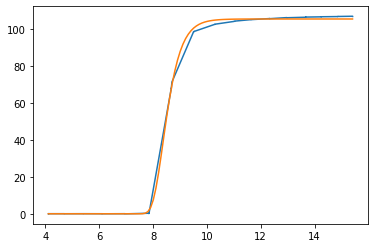

In [13]:
%matplotlib inline
B=1
T, R = T2.R_vs_T(B)
T_fit, R_fit = T2.fit_function(B)
# for t,r,tf,rf in zip(T.values(), R.values(), T_fit.values(), R_fit.values()):
#     plt.plot(t,r)
#     plt.plot(tf, rf)
# print(T_fit, R_fit)

plt.plot(*T2.R_vs_T(B=0.1), *T2.fit_function(B=0.1))

Testing the fit area limits

In [5]:
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

# reducing fit area RvsT
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

# T2.set_RT_fit_limits(0,np.inf)
# T2.fit_function_parameters(B='all')
# T2.calc_diffusivity()
# d_values=T2.get_Dfit_properties()
# print(d_values)

#changing fit area Bc2vsT
T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8)
d_values=T2.get_Dfit_properties()
print(d_values)

(0.6319457631309913, -1.7362137891651017, 15.081371097457144, 1.9266616307043327e-07, 0.005293328455452915, 0.9962219512791674)
(0.6318590996806766, -1.7364519218081689, 15.082947988533064, 1.9189651026816363e-07, 0.005273629266585432, 0.9962509384385395)
(0.6314281638725192, -1.737637011981628, 15.090602080133241, 1.8857927301009163e-07, 0.005189542424988822, 0.996374043541886)
(0.6519157519764284, -1.6830287420208891, 14.730191726584808, 8.042866203073177e-08, 0.002076399434583691, 0.9997489191293637)
